<font size="6">Hotel Booking Cancellation Prediction</font>

This notebook serves as supervised classification machine learning model exercise.

# Load Dataset

Dataset used in this project was acquired from: [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)  
Antonio, N., de Almedia, A. & Nunes, L. 2019. Hotel Booking Demand Datasets. *Data in Brief* (22):41-49.

In [89]:
import pandas as pd
import numpy as np
import statistics

In [90]:
hotel= pd.read_csv('hotel_bookings.csv')
hotel= hotel.iloc[:5000][['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 
                          'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 
                          'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 
                          'required_car_parking_spaces', 'total_of_special_requests']]
hotel

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


## Data - Columns Description

Data were obtained from 2 hotels which are located in Portugal: Resort Hotel at the resort region of Algarve and City Hotel at the city of Lisbon. In this analysis, only the **first 5000 data** were used, which **only consist of Resort Hotel**, and also **only using these columns below** for analysis:

* is_canceled: *Value indicating if the booking was canceled (1) or not (0).*
* adults: *Number of adults.*
* children: *Number of children.*
* babies: *Number of babies.*
* meal: *Type of meal booked. Categories are presented in standard hospitality meal packages:* 
    * *Undefined/SC – no meal package;*
    * *BB – Bed & Breakfast;*
    * *HB – Half board (breakfast and one other meal – usually dinner);*
    * *FB – Full board (breakfast, lunch and dinner).*
* country: *Country of origin.*
* market_segment: *Market segment designation.* 
    * *In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.*
* distribution_channel:  Booking distribution channel. 
    * *The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.*
* reserved_room_type:  *Code of room type reserved. Code is presented instead of designation for anonymity reasons.*
* booking_changes:  *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.*
* deposit_type: *Indication on if the customer made a deposit to guarantee the booking.*
    * *No Deposit – no deposit was made;*
    * *Non Refund – a deposit was made in the value of the total stay cost;*
    * *Refundable – a deposit was made with a value under the total cost of stay.*
* days_in_waiting_list: *Number of days the booking was in the waiting list before it was confirmed to the customer.*
* customer_type: *Type of booking, assuming one of four categories:*
    * *Contract - when the booking has an allotment or other type of contract associated to it;*
    * *Group – when the booking is associated to a group;*
    * *Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;*
    * *Transient-party – when the booking is transient, but is associated to at least other transient booking.*
* required_car_parking_spaces: *Number of car parking spaces required by the customer.*
* total_of_special_requests: *Number of special requests made by the customer (e.g. twin bed or high floor).*

# Data Cleaning

## Quick Exploratory Data Analysis (EDA)

In [91]:
hotel.describe() # There were unusual max value in adults, children, days_in_waiting_list columns.

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.459600,1.969800,0.115600,0.014800,0.207200,1.772000,0.093800,0.602000
std,0.498415,1.566326,0.444833,0.122409,0.612489,13.545358,0.292948,0.823245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,55.000000,10.000000,2.000000,17.000000,122.000000,2.000000,4.000000


In [92]:
hotel.describe(include='object') # There were 2 missing value in country column.

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
count,5000,5000,4998,5000,5000,5000,5000,5000
unique,1,5,56,6,3,9,3,4
top,Resort Hotel,BB,PRT,Online TA,TA/TO,A,No Deposit,Transient
freq,5000,3418,3174,2156,3657,3167,4461,3699


Making sure that the categorical data's unique values are the same with the paper description:

### Meal

In [93]:
hotel['meal'].unique() # Based on the research paper, SC and Undefined supposed to be in the same group - no meal package.

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

### Country

In [94]:
hotel['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN'], dtype=object)

### Market Segment

In [95]:
hotel['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups'], dtype=object)

### Distribution Channel

In [96]:
hotel['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO'], dtype=object)

### Deposit Type

In [97]:
hotel['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

### Customer Type

In [98]:
hotel['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

## Extreme Values in adults, children, and days_in_waiting_list

In [99]:
hotel[hotel['adults']>3]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
125,Resort Hotel,0,4,0.0,0,FB,PRT,Complementary,Direct,H,2,No Deposit,0,Transient,0,1
354,Resort Hotel,0,4,0.0,0,BB,PRT,Direct,Direct,L,0,No Deposit,0,Transient,0,0
1023,Resort Hotel,1,4,0.0,0,BB,PRT,Direct,Direct,H,0,No Deposit,0,Transient,0,0
1539,Resort Hotel,1,40,0.0,0,BB,PRT,Direct,Direct,A,0,No Deposit,0,Group,0,0
1587,Resort Hotel,1,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,A,0,No Deposit,0,Group,0,0
1643,Resort Hotel,1,50,0.0,0,BB,PRT,Direct,Direct,A,0,No Deposit,0,Group,0,0
1752,Resort Hotel,1,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,A,0,No Deposit,0,Group,0,0
1884,Resort Hotel,1,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,A,0,No Deposit,0,Group,0,0
1917,Resort Hotel,1,27,0.0,0,HB,PRT,Direct,Direct,A,0,No Deposit,0,Group,0,0
1962,Resort Hotel,1,27,0.0,0,HB,PRT,Direct,Direct,A,0,No Deposit,0,Group,0,0


In [100]:
hotel[hotel['children']>3]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
328,Resort Hotel,1,2,10.0,0,BB,PRT,Offline TA/TO,TA/TO,D,2,No Deposit,0,Contract,0,1


In [101]:
hotel[hotel['days_in_waiting_list']>3]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
2272,Resort Hotel,0,2,0.0,0,BB,PRT,Corporate,Corporate,A,0,No Deposit,50,Contract,0,0
2486,Resort Hotel,0,2,0.0,0,HB,ESP,Groups,Direct,A,0,No Deposit,47,Transient-Party,0,0
2487,Resort Hotel,0,2,0.0,0,HB,ESP,Groups,Direct,A,0,No Deposit,47,Transient-Party,0,0
2488,Resort Hotel,0,2,0.0,0,HB,ESP,Groups,Direct,A,0,No Deposit,47,Transient-Party,0,0
2490,Resort Hotel,0,2,0.0,0,HB,ESP,Groups,Direct,A,0,No Deposit,47,Transient-Party,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3703,Resort Hotel,0,2,0.0,0,Undefined,PRT,Groups,TA/TO,A,0,No Deposit,122,Transient,0,0
3704,Resort Hotel,0,2,0.0,0,Undefined,PRT,Groups,TA/TO,A,0,No Deposit,122,Transient-Party,0,0
3705,Resort Hotel,0,1,0.0,0,HB,PRT,Groups,TA/TO,A,5,No Deposit,122,Transient-Party,0,0
3706,Resort Hotel,0,1,0.0,0,HB,PRT,Groups,TA/TO,A,1,No Deposit,122,Transient-Party,0,0


Regarding the extreme values in these columns, we can see that:
* All hotel booking with extreme values in adults and children columns were cancelled.
* Max value of days_in_waiting_list (122) were resulting in check-in. So it is valid, not a data collecting error.

Thus, we don't need to remove or alter these values, because they can help us to determine the cancellation of hotel booking.

## Missing Values of country

In [102]:
hotel[hotel['country'].isna()]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
30,Resort Hotel,0,1,0.0,0,BB,NaN,Direct,Direct,A,2,No Deposit,0,Transient,0,2
4127,Resort Hotel,1,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,P,0,No Deposit,0,Transient,0,0


There is no way to determine the missing value of the country, so we can either drop these rows or fill it with the mode of country column. Since data are valuable, and with the consideration of there were only 2 missing value, it's safe to fill the missing value with mode.

In [103]:
hotel['country'].mode()

0    PRT
dtype: object

In [104]:
hotel['country'].fillna(hotel['country'].mode()[0], inplace=True)

In [105]:
hotel.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

## Mean of Adults in Groups - Customer Type

In [106]:
hotel[hotel['customer_type']=='Group']['adults'].mean()

16.52

In [107]:
hotel[hotel['customer_type']=='Group']['adults'].max()

55

In [108]:
hotel[(hotel['customer_type']=='Group')&(hotel['adults']<16)]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
539,Resort Hotel,0,2,0.0,0,BB,PRT,Online TA,TA/TO,A,0,No Deposit,0,Group,1,0
541,Resort Hotel,0,2,0.0,0,BB,PRT,Online TA,TA/TO,A,0,No Deposit,0,Group,0,0
1156,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Group,0,0
1707,Resort Hotel,1,2,0.0,0,BB,PRT,Online TA,TA/TO,A,0,No Deposit,0,Group,0,2
1733,Resort Hotel,0,2,2.0,0,BB,BRA,Online TA,TA/TO,H,0,No Deposit,0,Group,1,0
1772,Resort Hotel,0,2,0.0,0,BB,IRL,Offline TA/TO,TA/TO,A,0,No Deposit,0,Group,0,2
1970,Resort Hotel,0,2,0.0,0,BB,PRT,Online TA,TA/TO,A,0,No Deposit,0,Group,0,0
2200,Resort Hotel,0,2,0.0,0,BB,BEL,Online TA,TA/TO,A,0,No Deposit,0,Group,0,1
2229,Resort Hotel,1,6,0.0,0,BB,PRT,Direct,Direct,E,0,No Deposit,0,Group,0,0
2231,Resort Hotel,1,5,0.0,0,BB,PRT,Direct,Direct,A,0,No Deposit,0,Group,0,0


There were orders with only 2 adults but classified into Group in Customer Type. Were these wrong data input?

### Transient Profile

In [109]:
hotel[hotel['customer_type']=='Transient']['adults'].mean()

1.9299810759664775

In [110]:
hotel[(hotel['customer_type']=='Transient')&(hotel['adults']>2)]['adults'].max()

4

### Contract Profile

In [111]:
hotel[hotel['customer_type']=='Contract']['adults'].mean()

1.904109589041096

In [112]:
hotel[(hotel['customer_type']=='Contract')&(hotel['adults']>2)]['adults'].max()

3

### Transient-Party Profile

In [113]:
hotel[hotel['customer_type']=='Transient-Party']['adults'].mean()

1.7786187322611164

In [114]:
hotel[(hotel['customer_type']=='Transient-Party')&(hotel['adults']>2)]['adults'].max()

3

Since the means of Transient, Contract, and Transient-Party are almost the same, the mode of customer_type (Transient) will be used to fill the suspectedly wrong data input in Groups customer_type.

In [115]:
hotel['customer_type'].mode()[0]

'Transient'

In [116]:
index=hotel.loc[(hotel['customer_type']=='Group')&(hotel['adults']<5)].index
index

Int64Index([539, 541, 1156, 1707, 1733, 1772, 1970, 2200, 2979], dtype='int64')

In [117]:
hotel.iloc[index]=hotel.iloc[index].replace(to_replace='Group', value=hotel['customer_type'].mode()[0])

In [118]:
hotel.iloc[index]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
539,Resort Hotel,0,2,0.0,0,BB,PRT,Online TA,TA/TO,A,0,No Deposit,0,Transient,1,0
541,Resort Hotel,0,2,0.0,0,BB,PRT,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,0
1156,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,0
1707,Resort Hotel,1,2,0.0,0,BB,PRT,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,2
1733,Resort Hotel,0,2,2.0,0,BB,BRA,Online TA,TA/TO,H,0,No Deposit,0,Transient,1,0
1772,Resort Hotel,0,2,0.0,0,BB,IRL,Offline TA/TO,TA/TO,A,0,No Deposit,0,Transient,0,2
1970,Resort Hotel,0,2,0.0,0,BB,PRT,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,0
2200,Resort Hotel,0,2,0.0,0,BB,BEL,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
2979,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,A,1,No Deposit,0,Transient,0,0


In [119]:
hotel[(hotel['customer_type']=='Group')&(hotel['adults']<16)]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
2229,Resort Hotel,1,6,0.0,0,BB,PRT,Direct,Direct,E,0,No Deposit,0,Group,0,0
2231,Resort Hotel,1,5,0.0,0,BB,PRT,Direct,Direct,A,0,No Deposit,0,Group,0,0
2417,Resort Hotel,1,10,0.0,0,BB,PRT,Direct,Direct,E,0,No Deposit,0,Group,0,0
2419,Resort Hotel,1,5,0.0,0,BB,PRT,Direct,Direct,A,0,No Deposit,0,Group,0,0


## Connection between Market Segmentation with Distribution Channel and Customer Type

In [120]:
hotel['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups'], dtype=object)

It seems that the market segmentation of this dataset comes from its distribution channel (Direct, Corporate, TA/TO) and customer type (Groups).

**Does types of Distribution Channel matches with types of Market Segment?**

In [121]:
hotel['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO'], dtype=object)

In [122]:
hotel[hotel['distribution_channel']=='TA/TO']['market_segment'].value_counts()

Online TA        2156
Offline TA/TO     926
Groups            562
Direct             11
Complementary       2
Name: market_segment, dtype: int64

In [123]:
hotel[hotel['distribution_channel']=='Direct']['market_segment'].value_counts()

Direct           606
Groups           441
Corporate         10
Complementary      8
Offline TA/TO      3
Name: market_segment, dtype: int64

In [124]:
hotel[hotel['distribution_channel']=='Corporate']['market_segment'].value_counts()

Corporate        251
Groups            22
Complementary      1
Direct             1
Name: market_segment, dtype: int64

No. But if looked closely, the majority group of market segment matched with the distribution channel. Thus, supporting the assumption above that the market segmentation was generated from its distribution channel. So, the minority unmatched group will be treated as false data input or collection.

**Does types of Customer Type matches with types of Market Segment?**

In [125]:
hotel['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [126]:
hotel[hotel['customer_type']=='Transient']['market_segment'].value_counts()

Online TA        2091
Direct            546
Offline TA/TO     534
Groups            442
Corporate          84
Complementary      11
Name: market_segment, dtype: int64

In [127]:
hotel[hotel['customer_type']=='Contract']['market_segment'].value_counts()

Offline TA/TO    191
Corporate         12
Direct            12
Groups             4
Name: market_segment, dtype: int64

In [128]:
hotel[hotel['customer_type']=='Transient-Party']['market_segment'].value_counts()

Groups           579
Offline TA/TO    199
Corporate        165
Online TA         65
Direct            49
Name: market_segment, dtype: int64

In [129]:
hotel[hotel['customer_type']=='Group']['market_segment'].value_counts()

Direct           11
Offline TA/TO     5
Name: market_segment, dtype: int64

Also no. But since transient, contract, and transient-party were not included in market segmentation, there are no certainty of using this column to correct the market segment. And, from the last code, there was no Group market segment in any Groups customer type.

### Matching Distribution Channel with Market Segment

From the assumption of market segmentation in this dataset came from its distribution channel and not *vice versa*, then it is logically right to change the value of market segment based on its distribution channel.

#### TA/TO

In [130]:
hotel[hotel['distribution_channel']=='TA/TO']['market_segment'].value_counts()

Online TA        2156
Offline TA/TO     926
Groups            562
Direct             11
Complementary       2
Name: market_segment, dtype: int64

In [131]:
hotel[hotel['distribution_channel']=='TA/TO']['market_segment'].value_counts().reset_index()['index'][0]

'Online TA'

In [132]:
index=hotel.loc[(hotel['distribution_channel']=='TA/TO')&(hotel['market_segment']=='Direct')].index
hotel.iloc[index]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
282,Resort Hotel,0,2,0.0,1,BB,PRT,Direct,TA/TO,A,1,No Deposit,0,Transient,0,1
365,Resort Hotel,1,2,0.0,0,HB,PRT,Direct,TA/TO,A,0,No Deposit,0,Transient,0,1
396,Resort Hotel,0,2,2.0,0,HB,PRT,Direct,TA/TO,H,1,No Deposit,0,Transient,1,2
660,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,TA/TO,D,0,No Deposit,0,Transient,0,2
1503,Resort Hotel,0,1,0.0,0,BB,PRT,Direct,TA/TO,A,0,No Deposit,0,Transient,0,0
1544,Resort Hotel,0,2,0.0,0,BB,IRL,Direct,TA/TO,A,0,No Deposit,0,Transient-Party,0,2
1545,Resort Hotel,1,2,0.0,0,BB,PRT,Direct,TA/TO,A,0,No Deposit,0,Transient,0,0
1591,Resort Hotel,1,2,1.0,0,HB,PRT,Direct,TA/TO,E,1,No Deposit,0,Transient,0,0
1659,Resort Hotel,1,2,0.0,0,BB,PRT,Direct,TA/TO,A,0,No Deposit,0,Transient,0,0
1660,Resort Hotel,1,2,0.0,0,BB,PRT,Direct,TA/TO,A,0,No Deposit,0,Transient,0,0


In [133]:
hotel.iloc[index]=hotel.iloc[index].replace(to_replace='Direct', value=hotel[hotel['distribution_channel']=='TA/TO']['market_segment'].value_counts().reset_index()['index'][0])

In [134]:
hotel.iloc[index]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
282,Resort Hotel,0,2,0.0,1,BB,PRT,Online TA,TA/TO,A,1,No Deposit,0,Transient,0,1
365,Resort Hotel,1,2,0.0,0,HB,PRT,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
396,Resort Hotel,0,2,2.0,0,HB,PRT,Online TA,TA/TO,H,1,No Deposit,0,Transient,1,2
660,Resort Hotel,0,2,0.0,0,BB,PRT,Online TA,TA/TO,D,0,No Deposit,0,Transient,0,2
1503,Resort Hotel,0,1,0.0,0,BB,PRT,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,0
1544,Resort Hotel,0,2,0.0,0,BB,IRL,Online TA,TA/TO,A,0,No Deposit,0,Transient-Party,0,2
1545,Resort Hotel,1,2,0.0,0,BB,PRT,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,0
1591,Resort Hotel,1,2,1.0,0,HB,PRT,Online TA,TA/TO,E,1,No Deposit,0,Transient,0,0
1659,Resort Hotel,1,2,0.0,0,BB,PRT,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,0
1660,Resort Hotel,1,2,0.0,0,BB,PRT,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,0


In [135]:
hotel[hotel['distribution_channel']=='TA/TO']['market_segment'].value_counts()

Online TA        2167
Offline TA/TO     926
Groups            562
Complementary       2
Name: market_segment, dtype: int64

#### Direct

In [136]:
hotel[hotel['distribution_channel']=='Direct']['market_segment'].value_counts()

Direct           606
Groups           441
Corporate         10
Complementary      8
Offline TA/TO      3
Name: market_segment, dtype: int64

In [137]:
index=hotel.loc[(hotel['distribution_channel']=='Direct')&(hotel['market_segment']=='Offline TA/TO')].index
hotel.iloc[index]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
1437,Resort Hotel,1,2,0.0,0,HB,PRT,Offline TA/TO,Direct,A,0,No Deposit,0,Transient,0,0
1614,Resort Hotel,1,2,0.0,0,HB,PRT,Offline TA/TO,Direct,A,1,No Deposit,0,Transient,0,0
2255,Resort Hotel,0,1,0.0,0,BB,ESP,Offline TA/TO,Direct,A,0,No Deposit,0,Transient,0,0


In [138]:
hotel.iloc[index]=hotel.iloc[index].replace(to_replace='Offline TA/TO', value='Direct')

In [139]:
index=hotel.loc[(hotel['distribution_channel']=='Direct')&(hotel['market_segment']=='Corporate')].index
hotel.iloc[index]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
1530,Resort Hotel,0,2,0.0,0,BB,ITA,Corporate,Direct,A,0,No Deposit,0,Transient-Party,0,0
1531,Resort Hotel,0,2,0.0,0,BB,SMR,Corporate,Direct,A,0,No Deposit,0,Transient-Party,0,0
1533,Resort Hotel,0,2,0.0,0,BB,ITA,Corporate,Direct,A,0,No Deposit,0,Transient-Party,0,0
1535,Resort Hotel,0,1,0.0,0,BB,ITA,Corporate,Direct,A,1,No Deposit,0,Transient-Party,0,0
1536,Resort Hotel,0,2,0.0,0,BB,ITA,Corporate,Direct,A,0,No Deposit,0,Transient-Party,0,0
1537,Resort Hotel,0,2,0.0,0,BB,PRT,Corporate,Direct,A,0,No Deposit,0,Transient,0,0
1538,Resort Hotel,0,2,0.0,0,BB,FRA,Corporate,Direct,A,0,No Deposit,0,Transient-Party,0,0
1681,Resort Hotel,0,1,0.0,0,BB,PRT,Corporate,Direct,A,0,No Deposit,0,Transient,0,0
1727,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Direct,A,0,No Deposit,0,Transient,0,0
4288,Resort Hotel,1,1,0.0,0,BB,PRT,Corporate,Direct,A,0,No Deposit,0,Transient,0,0


In [140]:
hotel.iloc[index]=hotel.iloc[index].replace(to_replace='Corporate', value='Direct')

In [141]:
hotel[hotel['distribution_channel']=='Direct']['market_segment'].value_counts()

Direct           619
Groups           441
Complementary      8
Name: market_segment, dtype: int64

#### Corporate

In [142]:
hotel[hotel['distribution_channel']=='Corporate']['market_segment'].value_counts()

Corporate        251
Groups            22
Complementary      1
Direct             1
Name: market_segment, dtype: int64

In [143]:
index=hotel.loc[(hotel['distribution_channel']=='Corporate')&(hotel['market_segment']=='Direct')].index
hotel.iloc[index]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
4482,Resort Hotel,1,1,0.0,0,BB,PRT,Direct,Corporate,A,0,No Deposit,0,Transient,0,0


In [144]:
hotel.iloc[index]=hotel.iloc[index].replace(to_replace='Direct', value='Corporate')

In [145]:
hotel[hotel['distribution_channel']=='Corporate']['market_segment'].value_counts()

Corporate        252
Groups            22
Complementary      1
Name: market_segment, dtype: int64

## Ghost?

In [146]:
index=hotel.loc[(hotel['adults']==0)].index
hotel.iloc[index]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
2224,Resort Hotel,0,0,0.0,0,SC,PRT,Corporate,Corporate,A,1,No Deposit,0,Transient-Party,0,0
2409,Resort Hotel,0,0,0.0,0,SC,PRT,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
3181,Resort Hotel,0,0,0.0,0,SC,ESP,Groups,TA/TO,A,0,No Deposit,0,Transient-Party,0,0
3684,Resort Hotel,0,0,0.0,0,SC,PRT,Groups,TA/TO,A,1,No Deposit,122,Transient-Party,0,0
3708,Resort Hotel,0,0,0.0,0,SC,PRT,Groups,TA/TO,A,1,No Deposit,122,Transient-Party,0,0
4127,Resort Hotel,1,0,0.0,0,SC,PRT,Offline TA/TO,TA/TO,P,0,No Deposit,0,Transient,0,0


This is clearly an input error. The adults value will be filled with mean of adults based on their market segment.

In [147]:
hotel.groupby('market_segment')['adults'].mean()

market_segment
Complementary    2.000000
Corporate        1.424603
Direct           2.339257
Groups           1.884878
Offline TA/TO    2.053996
Online TA        1.931703
Name: adults, dtype: float64

In [148]:
hotel.loc[(hotel['adults']==0)&(hotel['is_canceled']==0),'adults']=2

In [149]:
hotel.iloc[index]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
2224,Resort Hotel,0,2,0.0,0,SC,PRT,Corporate,Corporate,A,1,No Deposit,0,Transient-Party,0,0
2409,Resort Hotel,0,2,0.0,0,SC,PRT,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
3181,Resort Hotel,0,2,0.0,0,SC,ESP,Groups,TA/TO,A,0,No Deposit,0,Transient-Party,0,0
3684,Resort Hotel,0,2,0.0,0,SC,PRT,Groups,TA/TO,A,1,No Deposit,122,Transient-Party,0,0
3708,Resort Hotel,0,2,0.0,0,SC,PRT,Groups,TA/TO,A,1,No Deposit,122,Transient-Party,0,0
4127,Resort Hotel,1,0,0.0,0,SC,PRT,Offline TA/TO,TA/TO,P,0,No Deposit,0,Transient,0,0


## Latest Stats

In [150]:
hotel.describe()

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.459600,1.971800,0.115600,0.014800,0.207200,1.772000,0.093800,0.602000
std,0.498415,1.565086,0.444833,0.122409,0.612489,13.545358,0.292948,0.823245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,55.000000,10.000000,2.000000,17.000000,122.000000,2.000000,4.000000


In [151]:
hotel.describe(include='object')

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
count,5000,5000,5000,5000,5000,5000,5000,5000
unique,1,5,56,6,3,9,3,4
top,Resort Hotel,BB,PRT,Online TA,TA/TO,A,No Deposit,Transient
freq,5000,3418,3176,2167,3657,3167,4461,3708


In [152]:
hotel.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

# Detailed EDA

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df= hotel.copy()
df.drop(columns='hotel',inplace=True)
df.head()

,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


## How many orders were cancelled?

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

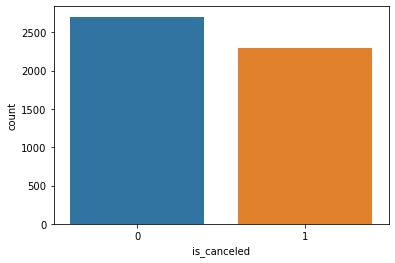

In [155]:
sns.countplot(data=df,x='is_canceled')

In [156]:
print('Total of canceled booking:',(df['is_canceled'].value_counts()[1]))
print('Percentage of canceled booking:',(df['is_canceled'].value_counts()[1]/df['is_canceled'].value_counts().sum())*100,'%')

Total of canceled booking: 2298
Percentage of canceled booking: 45.96 %


The amount of canceled booking are 2298 and almost 50% of total order. It's a bad thing for the hotel, but it's a good collection of data for us to predict which order will be canceled since imbalanced classification is not an issue in this dataset.

## Customer Profiling and Behavior

### Meal

<AxesSubplot:xlabel='meal', ylabel='count'>

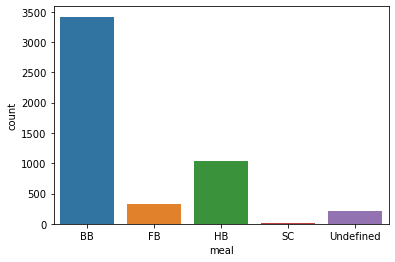

In [157]:
sns.countplot(data=df,x='meal')

The meal ordered by canceled (1) or non-canceled (0) booking orders were dominated by bed and breakfast (BB), then followed by half-board (HB), full-board (FB), Undefined and SC (No meal package).

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

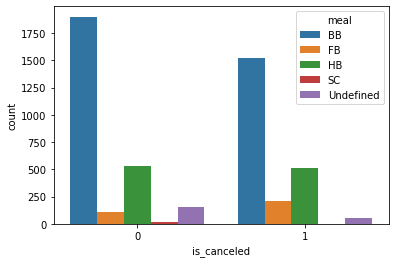

In [158]:
sns.countplot(data=df,x='is_canceled',hue='meal')

Considering the total observation of each group of is_canceled, the decrease in BB also followed by the expected decrease of Undefined/SC meal order, but not in FB and HB.

In [159]:
pd.crosstab(df['is_canceled'],df['meal'],margins=True,normalize='index')

meal,BB,FB,HB,SC,Undefined
is_canceled,,,,,
0,0.702813,0.038860,0.195781,0.004811,0.057735
1,0.661010,0.093124,0.221062,0.000435,0.024369
All,0.683600,0.063800,0.207400,0.002800,0.042400


FB meal order had higher booking cancellation than other meal orders. By looking at proportion (table above), HB also had higher count of booking cancellation. Subjectively, when looking at the big picture, both 0 and 1 have the same pattern of meal order that may indicates that the meal data was not affecting the booking cancellation.

### Market Segment

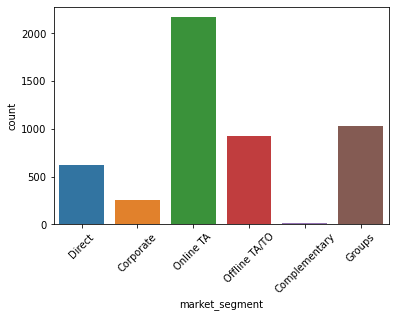

In [160]:
sns.countplot(data=df,x='market_segment')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

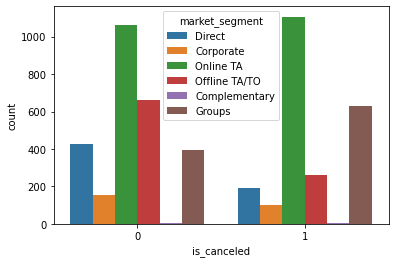

In [161]:
sns.countplot(data=df,x='is_canceled',hue='market_segment')

Orders were dominated by online TA. There were decrease of booking cancellation (proportion) in direct, corporate, and offline TA/TO market segmentation, while there was increase of booking cancellation in groups market segmentation.

In [162]:
pd.crosstab(df['is_canceled'],df['market_segment'],margins=True,normalize='index')

market_segment,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
is_canceled,,,,,,
0,0.002591,0.056255,0.157661,0.145448,0.245374,0.392672
1,0.001741,0.043516,0.083986,0.275022,0.114447,0.481288
All,0.002200,0.050400,0.123800,0.205000,0.185200,0.433400


### Distribution Channel

<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

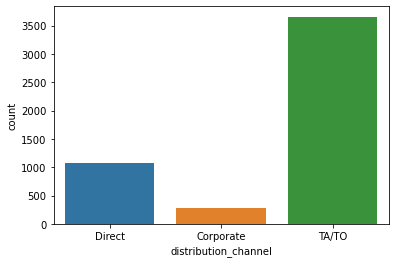

In [163]:
sns.countplot(data=df,x='distribution_channel')

<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

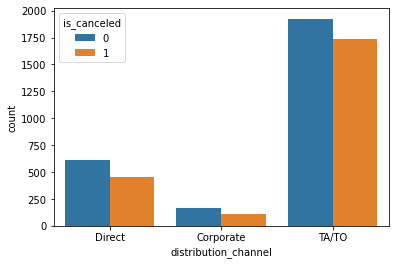

In [164]:
sns.countplot(data=df,x='distribution_channel',hue='is_canceled')

Orders were dominated by TA/TO, followed by Direct and Corporate distribution channel. There were slight decrease of booking cancellation from each distribution channel. Subjectively from the graph, there were no differences of distribution channel proportion from 0 and 1 group. But:

In [165]:
pd.crosstab(df['is_canceled'],df['distribution_channel'],margins=True,normalize='columns')

distribution_channel,Corporate,Direct,TA/TO,All
is_canceled,,,,
0,0.596364,0.574906,0.526114,0.5404
1,0.403636,0.425094,0.473886,0.4596


There was a shift of increased booking cancellation (proportion) from the table above. Corporate<Direct<TA/TO (booking cancellation).

### Reserved Room Type

<AxesSubplot:xlabel='reserved_room_type', ylabel='count'>

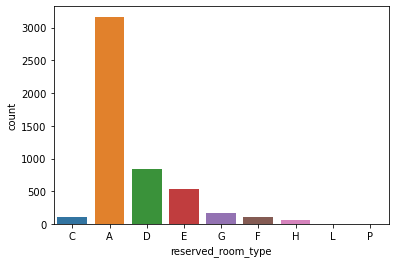

In [166]:
sns.countplot(data=df,x='reserved_room_type')

In [167]:
df[df['reserved_room_type']=='P'] # No adults, chilren, babies

,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
4127,1,0,0.0,0,SC,PRT,Offline TA/TO,TA/TO,P,0,No Deposit,0,Transient,0,0


In [168]:
df[df['reserved_room_type']=='L']

,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
354,0,4,0.0,0,BB,PRT,Direct,Direct,L,0,No Deposit,0,Transient,0,0
504,1,2,0.0,0,BB,PRT,Direct,Direct,L,0,No Deposit,0,Transient,0,0
911,0,2,0.0,0,BB,PRT,Direct,Direct,L,0,No Deposit,0,Transient,0,0


Reserved room type was dominated by room A, followed by D, E, G, etc. To compare reserved room type and booking cancellation, we need to transform the data.

In [169]:
tab1=pd.crosstab(df['is_canceled'],df['reserved_room_type'],normalize='columns').T
tab1=tab1.reset_index().rename_axis(None, axis=1)

<AxesSubplot:title={'center':'Stacked Bar Graph'}, ylabel='reserved_room_type'>

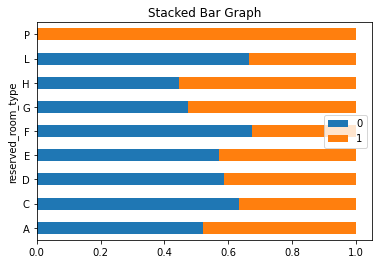

In [170]:
tab1.plot(
    x = 'reserved_room_type',
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

H room had the highest booking cancellation rate followed by room G, A, E, D, C, and F while ignoring room L and P (low observation).

### Customer Type

<AxesSubplot:xlabel='customer_type', ylabel='count'>

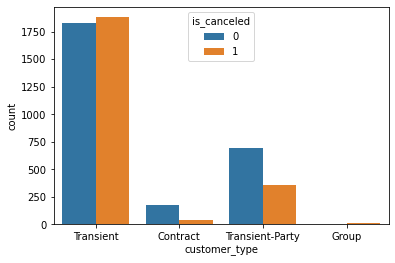

In [171]:
sns.countplot(data=df,x='customer_type',hue='is_canceled')

In [172]:
pd.crosstab(df['is_canceled'],df['customer_type'])

customer_type,Contract,Group,Transient,Transient-Party
is_canceled,,,,
0,177,0,1827,698
1,42,16,1881,359


All 'Group' customer type orders were canceled. Transient count between 0 and 1 group were comparable, while there is significant decrease of booking cancellation (proportion) of Contract and Transient-Party.

### Deposit type

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

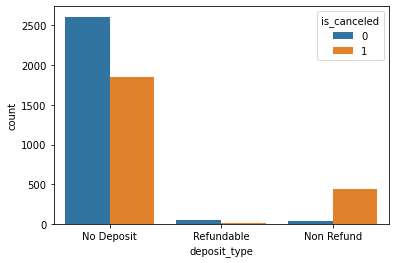

In [173]:
sns.countplot(data=df,x='deposit_type',hue='is_canceled')

In [174]:
pd.crosstab(df['is_canceled'],df['deposit_type'])

deposit_type,No Deposit,Non Refund,Refundable
is_canceled,,,
0,2609,39,54
1,1852,438,8


A significant amount of booking cancellation can be seen at non-refund group.

### Country

In [175]:
df['country'].value_counts().reset_index().rename(columns={'country':'count','index':'country'})

,country,count
0,PRT,3176
1,ESP,550
2,GBR,505
3,IRL,172
4,FRA,113
5,DEU,89
6,NLD,55
7,CN,33
8,BEL,29
9,USA,28


In [176]:
tab2=df['country'].value_counts().reset_index().rename(columns={'country':'count','index':'country'})[:18]
tab2 # Countries with minimum order of 10

,country,count
0,PRT,3176
1,ESP,550
2,GBR,505
3,IRL,172
4,FRA,113
5,DEU,89
6,NLD,55
7,CN,33
8,BEL,29
9,USA,28


In [177]:
dfcountry=df.loc[df['country'].isin(list(tab2['country']))]
dfcountry

,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


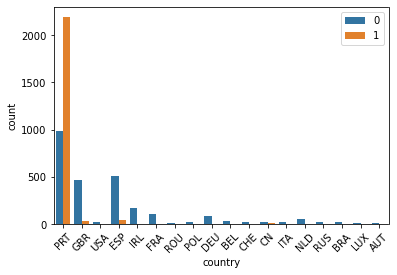

In [178]:
sns.countplot(data=dfcountry,x='country',hue='is_canceled')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [179]:
pd.crosstab(dfcountry['is_canceled'],dfcountry['country'])

country,AUT,BEL,BRA,CHE,CN,DEU,ESP,FRA,GBR,IRL,ITA,LUX,NLD,POL,PRT,ROU,RUS,USA
is_canceled,,,,,,,,,,,,,,,,,,
0,12,29,18,26,20,86,506,111,467,167,20,10,55,28,986,12,23,28
1,0,0,0,0,13,3,44,2,38,5,3,0,0,0,2190,0,0,0


In [180]:
pd.crosstab(dfcountry['is_canceled'],dfcountry['country'],normalize='columns')

country,AUT,BEL,BRA,CHE,CN,DEU,ESP,FRA,GBR,IRL,ITA,LUX,NLD,POL,PRT,ROU,RUS,USA
is_canceled,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,0.606061,0.966292,0.92,0.982301,0.924752,0.97093,0.869565,1.0,1.0,1.0,0.310453,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.393939,0.033708,0.08,0.017699,0.075248,0.02907,0.130435,0.0,0.0,0.0,0.689547,0.0,0.0,0.0


Booking cancelation rate in PRT was much higher compared to other country.

# Splitting Data

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
x=df[['adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 
     'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 
     'total_of_special_requests']]
y=df['is_canceled']

In [183]:
x_train, x_test, y_train, y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2020)

# Preprocessing

In [184]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

In [185]:
df.describe()

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.459600,1.971800,0.115600,0.014800,0.207200,1.772000,0.093800,0.602000
std,0.498415,1.565086,0.444833,0.122409,0.612489,13.545358,0.292948,0.823245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,55.000000,10.000000,2.000000,17.000000,122.000000,2.000000,4.000000


**Robust scaling**: adults, booking_changes, days_in_waiting_list

In [186]:
df.describe(include='object')

,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
count,5000,5000,5000,5000,5000,5000,5000
unique,5,56,6,3,9,3,4
top,BB,PRT,Online TA,TA/TO,A,No Deposit,Transient
freq,3418,3176,2167,3657,3167,4461,3708


**Binary encoding**: meal, country, market_segment, reserved_room_type  
**One hot encoding**: distribution_channel, deposit_type, customer_type

In [187]:
transformer = ColumnTransformer([
    ('one hot',OneHotEncoder(drop='first'),['distribution_channel','deposit_type','customer_type']),
    ('binary', ce.BinaryEncoder(), ['meal','country','market_segment','reserved_room_type']),
    ('robust', RobustScaler(), ['adults','booking_changes','days_in_waiting_list'])
], remainder = 'passthrough')

In [188]:
df.head()

,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [189]:
x=df[['adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 
     'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 
     'total_of_special_requests']]

# Evaluation Metric

Hotel is a service-oriented business. Thus, by predicting which person who will certainly check-in will help the managers to prepare for the arrival of the customers.  

Cancelled order as our target, thus:
1. True Positive: Predicted Cancelled, Actual Cancelled.
2. True Negative: Predicted Check-in, Actual Check-in.
3. False Positive: Predicted Cancelled, Actual Check-in.
4. False Negative: Predicted Check-in, Actual Cancelled.

In short term POV, false negative of booking cancellation prediction is more likely resulting in profit-loss because of unnecessary preparation of the hotel towards non-existent customer. But in the long term POV, failing to prepare for the customer's arrival also will reduce our customer's experience, resulting in unseen profit/opportunity-loss in the future (false positive). So, minimizing the false negative (**Recall**) or balancing false positive and false negative (**F1 score**) can work for this prediction model building.

# Method Selection

In [190]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [191]:
model_logreg = LogisticRegression(solver='liblinear',random_state=10)
model_knn= KNeighborsClassifier()
model_tree= DecisionTreeClassifier(random_state=10)
model_rfc = RandomForestClassifier(random_state=10)
model_ada= AdaBoostClassifier(random_state=10)
model_gbc= GradientBoostingClassifier(random_state=10)
model_xgbc= XGBClassifier(random_state=10)

In [192]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',model_tree)
])

In [193]:
hyperparam_space={
    'model':[model_tree,model_knn,model_tree,model_rfc,model_ada,model_gbc,model_xgbc]
}

In [194]:
skfold=StratifiedKFold(n_splits=5)
grid=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_jobs=-1
)

In [195]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['distribution_channel',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                    

In [196]:
pd.DataFrame(grid.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
0,{'model': DecisionTreeClassifier(random_state=...,0.850731,0.013533,5
1,{'model': KNeighborsClassifier()},0.810721,0.018066,7
2,{'model': DecisionTreeClassifier(random_state=...,0.850731,0.013533,5
3,{'model': RandomForestClassifier(random_state=...,0.860214,0.012437,3
4,{'model': AdaBoostClassifier(random_state=10)},0.854298,0.012674,4
5,{'model': GradientBoostingClassifier(random_st...,0.862410,0.012971,1
6,"{'model': XGBClassifier(base_score=None, boost...",0.860702,0.009606,2


Gradient boosting had the highest score. But, considering the standard deviation, XGBClassifier model was chosen for prediction model building.

# Base Model

In [215]:
best_model= XGBClassifier(random_state=10, use_label_encoder=False, scoring='f1')

estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', best_model)])

estimator.fit(x_train,y_train)

[15:11:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:11:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['distribution_channel',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['meal', 'country',
                                                   'market_segment',
                                                   'reserved_room_type']),
                                                 ('robust', RobustScaler(),
                                                  ['adults', 'booking_changes',
                                                   'days_in_waiting_list'])])),
                (...
      

In [216]:
y_pred=estimator.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       540
           1       0.83      0.89      0.86       460

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



Can we improve the model performance?

# Hyperparameter Tuning

In [217]:
model_xgbc= XGBClassifier(random_state=10)
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',model_xgbc)
])

In [201]:
estimator.get_params()

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('one hot', OneHotEncoder(drop='first'),
                                    ['distribution_channel', 'deposit_type',
                                     'customer_type']),
                                   ('binary', BinaryEncoder(),
                                    ['meal', 'country', 'market_segment',
                                     'reserved_room_type']),
                                   ('robust', RobustScaler(),
                                    ['adults', 'booking_changes',
                                     'days_in_waiting_list'])])),
  ('model',
   XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                 colsample_bynode=None, colsample_bytree=None,
                 enable_categorical=False, gamma=None, gpu_id=None,
                 importance_type=None, interaction_constraints=None,
                 learning_

In [202]:
hyperparam_space={
    'model__max_depth':[2,3,4,5,6,7,8],
    'model__n_estimators':[20,40,60,80,100],
    'model__learning_rate':[0.001,0.01,0.1,0.2,0.3],
    'model__eval_metric':['error','logloss']
}

In [203]:
skfold=StratifiedKFold(n_splits=5)
grid_search=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_jobs=-1
)

In [204]:
grid_search.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['distribution_channel',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                    

In [205]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8695425025209577
{'model__eval_metric': 'error', 'model__learning_rate': 0.2, 'model__max_depth': 8, 'model__n_estimators': 20}


# Test Dataset

In [218]:
best_model=model_xgbc= XGBClassifier(n_estimators=20,learning_rate=0.2,
                        random_state=10,max_depth=8, eval_metric='error', use_label_encoder=False, scoring='f1')
estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', best_model)])

estimator.fit(x_train,y_train)

[15:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['distribution_channel',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['meal', 'country',
                                                   'market_segment',
                                                   'reserved_room_type']),
                                                 ('robust', RobustScaler(),
                                                  ['adults', 'booking_changes',
                                                   'days_in_waiting_list'])])),
                (...
      

In [219]:
y_pred=estimator.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       540
           1       0.80      0.92      0.85       460

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



Hyperparameter tuning didn't improve the model performance.

# Features Importances

In [208]:
features=list(transformer.transformers_[0][1].get_feature_names_out())+transformer.transformers_[1][1].get_feature_names()+['adults','booking_changes','days_in_waiting_list','children','babies','required_car_parking_spaces','total_of_special_requests']
features

['distribution_channel_Direct',
 'distribution_channel_TA/TO',
 'deposit_type_Non Refund',
 'deposit_type_Refundable',
 'customer_type_Group',
 'customer_type_Transient',
 'customer_type_Transient-Party',
 'meal_0',
 'meal_1',
 'meal_2',
 'country_0',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'market_segment_0',
 'market_segment_1',
 'market_segment_2',
 'reserved_room_type_0',
 'reserved_room_type_1',
 'reserved_room_type_2',
 'reserved_room_type_3',
 'adults',
 'booking_changes',
 'days_in_waiting_list',
 'children',
 'babies',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [209]:
pd.DataFrame({'imp':best_model.feature_importances_},index=features).sort_values('imp', ascending=False)

,imp
country_4,0.452858
required_car_parking_spaces,0.095445
deposit_type_Non Refund,0.060972
country_1,0.055014
days_in_waiting_list,0.050099
market_segment_2,0.040319
country_2,0.037704
meal_0,0.030468
distribution_channel_TA/TO,0.028754
country_5,0.018305
